# Housing Price Prediction


In [126]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import OrdinalEncoder
from scipy.stats import zscore
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

import warnings
warnings.filterwarnings('ignore')

In [2]:
train_data=pd.read_excel('C:\\Users\\Dell\\Desktop\\Files\\train.xlsx')
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,127,120,RL,NaN,4928,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2007,WD,Normal,128000
1,889,20,RL,95.0,15865,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2007,WD,Normal,268000
2,793,60,RL,92.0,9920,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,269790
3,110,20,RL,105.0,11751,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,1,2010,COD,Normal,190000
4,422,20,RL,NaN,16635,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,215000


In [3]:
train_data.shape

(1168, 81)

In [4]:
train_data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [5]:
test_data=pd.read_excel('C:\\Users\\Dell\\Desktop\\Files\\test.xlsx')
test_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,337,20,RL,86.0,14157,Pave,NaN,IR1,HLS,AllPub,...,0,0,NaN,NaN,NaN,0,7,2007,WD,Normal
1,1018,120,RL,NaN,5814,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,8,2009,COD,Abnorml
2,929,20,RL,NaN,11838,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal
3,1148,70,RL,75.0,12000,Pave,NaN,Reg,Bnk,AllPub,...,0,0,NaN,NaN,NaN,0,7,2009,WD,Normal
4,1227,60,RL,86.0,14598,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,1,2008,WD,Normal


In [6]:
test_data.shape

(292, 80)

In [7]:
test_data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

# Data Cleaning

                          train_data

In [8]:
for column in train_data:
    t=train_data[column].isnull().sum()
    print(column,t)

Id 0
MSSubClass 0
MSZoning 0
LotFrontage 214
LotArea 0
Street 0
Alley 1091
LotShape 0
LandContour 0
Utilities 0
LotConfig 0
LandSlope 0
Neighborhood 0
Condition1 0
Condition2 0
BldgType 0
HouseStyle 0
OverallQual 0
OverallCond 0
YearBuilt 0
YearRemodAdd 0
RoofStyle 0
RoofMatl 0
Exterior1st 0
Exterior2nd 0
MasVnrType 7
MasVnrArea 7
ExterQual 0
ExterCond 0
Foundation 0
BsmtQual 30
BsmtCond 30
BsmtExposure 31
BsmtFinType1 30
BsmtFinSF1 0
BsmtFinType2 31
BsmtFinSF2 0
BsmtUnfSF 0
TotalBsmtSF 0
Heating 0
HeatingQC 0
CentralAir 0
Electrical 0
1stFlrSF 0
2ndFlrSF 0
LowQualFinSF 0
GrLivArea 0
BsmtFullBath 0
BsmtHalfBath 0
FullBath 0
HalfBath 0
BedroomAbvGr 0
KitchenAbvGr 0
KitchenQual 0
TotRmsAbvGrd 0
Functional 0
Fireplaces 0
FireplaceQu 551
GarageType 64
GarageYrBlt 64
GarageFinish 64
GarageCars 0
GarageArea 0
GarageQual 64
GarageCond 64
PavedDrive 0
WoodDeckSF 0
OpenPorchSF 0
EnclosedPorch 0
3SsnPorch 0
ScreenPorch 0
PoolArea 0
PoolQC 1161
Fence 931
MiscFeature 1124
MiscVal 0
MoSold 0
YrSold

The columns having null values:
    
    * LotFrontage
    * Alley         (1091)
    * MasVnrType
    * MasVnrArea
    * BsmtQual
    * BsmtCond
    * BsmtExposure
    * BsmtFinType1
    * BsmtFinType2
    * FireplaceQu
    * GarageType
    * GarageYrBlt
    * GarageFinish
    * GarageQual
    * GarageCond
    * PoolQC        (1161)
    * Fence         (931)
    * MiscFeature   (1124)
    
But four features having higher null values 

                                        Check Percentage value

In [9]:
a=(1091/1168)*100
print("Alley: ",a)

p=(1161/1168)*100
print("PoolQC:",p)

f=(931/1168)*100
print("Fence:",f)

m=(1124/1168)*100
print("MiscFeature:",m)

Alley:  93.40753424657534
PoolQC: 99.40068493150685
Fence: 79.70890410958904
MiscFeature: 96.23287671232876


Three features having more than 80% null values and one column has approx to 80% ,so we drop all four of the columns.

In [10]:
train_data=train_data.drop(['Alley','PoolQC','Fence','MiscFeature'],axis=1)
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,127,120,RL,NaN,4928,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2007,WD,Normal,128000
1,889,20,RL,95.0,15865,Pave,IR1,Lvl,AllPub,Inside,...,0,0,224,0,0,10,2007,WD,Normal,268000
2,793,60,RL,92.0,9920,Pave,IR1,Lvl,AllPub,CulDSac,...,0,0,0,0,0,6,2007,WD,Normal,269790
3,110,20,RL,105.0,11751,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,1,2010,COD,Normal,190000
4,422,20,RL,NaN,16635,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,6,2009,WD,Normal,215000


In [11]:
train_data.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 77, dtype: object

                                      Imputing technique on train_data

In [12]:
train_data['LotFrontage']=train_data['LotFrontage'].fillna(train_data['LotFrontage'].mean())
train_data['MasVnrType']=train_data['MasVnrType'].fillna(train_data['MasVnrType'].mode()[0])
train_data['MasVnrArea']=train_data['MasVnrArea'].fillna(train_data['MasVnrArea'].mean())
train_data['BsmtQual']=train_data['BsmtQual'].fillna(train_data['BsmtQual'].mode()[0])
train_data['BsmtCond']=train_data['BsmtCond'].fillna(train_data['BsmtCond'].mode()[0])
train_data['BsmtExposure']=train_data['BsmtExposure'].fillna(train_data['BsmtExposure'].mode()[0])
train_data['BsmtFinType1']=train_data['BsmtFinType1'].fillna(train_data['BsmtFinType1'].mode()[0])
train_data['BsmtFinType2']=train_data['BsmtFinType2'].fillna(train_data['BsmtFinType2'].mode()[0])
train_data['FireplaceQu']=train_data['FireplaceQu'].fillna(train_data['FireplaceQu'].mode()[0])
train_data['GarageType']=train_data['GarageType'].fillna(train_data['GarageType'].mode()[0])
train_data['GarageYrBlt']=train_data['GarageYrBlt'].fillna(train_data['GarageYrBlt'].mode()[0])
train_data['GarageFinish']=train_data['GarageFinish'].fillna(train_data['GarageFinish'].mode()[0])
train_data['GarageQual']=train_data['GarageQual'].fillna(train_data['GarageQual'].mode()[0])
train_data['GarageCond']=train_data['GarageCond'].fillna(train_data['GarageCond'].mode()[0])

In [13]:
train_data.isnull().sum().sum()

0

Now there is no null values in any of the columns

In [14]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 77 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    1168 non-null   float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   LotShape       1168 non-null   object 
 7   LandContour    1168 non-null   object 
 8   Utilities      1168 non-null   object 
 9   LotConfig      1168 non-null   object 
 10  LandSlope      1168 non-null   object 
 11  Neighborhood   1168 non-null   object 
 12  Condition1     1168 non-null   object 
 13  Condition2     1168 non-null   object 
 14  BldgType       1168 non-null   object 
 15  HouseStyle     1168 non-null   object 
 16  OverallQual    1168 non-null   int64  
 17  OverallCond    1168 non-null   int64  
 18  YearBuil

                      test_data

In [15]:
for column in test_data:
    t=test_data[column].isnull().sum()
    print(column,t)

Id 0
MSSubClass 0
MSZoning 0
LotFrontage 45
LotArea 0
Street 0
Alley 278
LotShape 0
LandContour 0
Utilities 0
LotConfig 0
LandSlope 0
Neighborhood 0
Condition1 0
Condition2 0
BldgType 0
HouseStyle 0
OverallQual 0
OverallCond 0
YearBuilt 0
YearRemodAdd 0
RoofStyle 0
RoofMatl 0
Exterior1st 0
Exterior2nd 0
MasVnrType 1
MasVnrArea 1
ExterQual 0
ExterCond 0
Foundation 0
BsmtQual 7
BsmtCond 7
BsmtExposure 7
BsmtFinType1 7
BsmtFinSF1 0
BsmtFinType2 7
BsmtFinSF2 0
BsmtUnfSF 0
TotalBsmtSF 0
Heating 0
HeatingQC 0
CentralAir 0
Electrical 1
1stFlrSF 0
2ndFlrSF 0
LowQualFinSF 0
GrLivArea 0
BsmtFullBath 0
BsmtHalfBath 0
FullBath 0
HalfBath 0
BedroomAbvGr 0
KitchenAbvGr 0
KitchenQual 0
TotRmsAbvGrd 0
Functional 0
Fireplaces 0
FireplaceQu 139
GarageType 17
GarageYrBlt 17
GarageFinish 17
GarageCars 0
GarageArea 0
GarageQual 17
GarageCond 17
PavedDrive 0
WoodDeckSF 0
OpenPorchSF 0
EnclosedPorch 0
3SsnPorch 0
ScreenPorch 0
PoolArea 0
PoolQC 292
Fence 248
MiscFeature 282
MiscVal 0
MoSold 0
YrSold 0
SaleTy

The columns having null values:
    
    * LotFrontage
    * Alley         (278)
    * MasVnrType
    * MasVnrArea
    * BsmtQual
    * BsmtCond
    * BsmtExposure
    * BsmtFinType1
    * BsmtFinType2
    * Electrical
    * FireplaceQu
    * GarageType
    * GarageYrBlt
    * GarageFinish
    * GarageQual
    * GarageCond
    * PoolQC        (292)
    * Fence         (248)
    * MiscFeature   (282)
    
But four features having higher null values 

In [16]:
a=(278/292)*100
print("Alley: ",a)

p=(292/292)*100
print("PoolQC:",p)

f=(248/292)*100
print("Fence:",f)

m=(282/292)*100
print("MiscFeature:",m)

Alley:  95.2054794520548
PoolQC: 100.0
Fence: 84.93150684931507
MiscFeature: 96.57534246575342


In [17]:
test_data=test_data.drop(['Alley','PoolQC','Fence','MiscFeature'],axis=1)
test_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,337,20,RL,86.0,14157,Pave,IR1,HLS,AllPub,Corner,...,51,0,0,0,0,0,7,2007,WD,Normal
1,1018,120,RL,NaN,5814,Pave,IR1,Lvl,AllPub,CulDSac,...,0,0,0,0,0,0,8,2009,COD,Abnorml
2,929,20,RL,NaN,11838,Pave,Reg,Lvl,AllPub,Inside,...,151,0,0,0,0,0,6,2009,WD,Normal
3,1148,70,RL,75.0,12000,Pave,Reg,Bnk,AllPub,Inside,...,0,0,0,0,0,0,7,2009,WD,Normal
4,1227,60,RL,86.0,14598,Pave,IR1,Lvl,AllPub,CulDSac,...,18,0,0,0,0,0,1,2008,WD,Normal


In [18]:
test_data['LotFrontage']=test_data['LotFrontage'].fillna(test_data['LotFrontage'].mean())
test_data['MasVnrType']=test_data['MasVnrType'].fillna(test_data['MasVnrType'].mode()[0])
test_data['MasVnrArea']=test_data['MasVnrArea'].fillna(test_data['MasVnrArea'].mean())
test_data['BsmtQual']=test_data['BsmtQual'].fillna(test_data['BsmtQual'].mode()[0])
test_data['BsmtCond']=test_data['BsmtCond'].fillna(test_data['BsmtCond'].mode()[0])
test_data['BsmtExposure']=test_data['BsmtExposure'].fillna(test_data['BsmtExposure'].mode()[0])
test_data['BsmtFinType1']=test_data['BsmtFinType1'].fillna(test_data['BsmtFinType1'].mode()[0])
test_data['BsmtFinType2']=test_data['BsmtFinType2'].fillna(test_data['BsmtFinType2'].mode()[0])
test_data['Electrical']=test_data['Electrical'].fillna(test_data['Electrical'].mode()[0])
test_data['FireplaceQu']=test_data['FireplaceQu'].fillna(test_data['FireplaceQu'].mode()[0])
test_data['GarageType']=test_data['GarageType'].fillna(test_data['GarageType'].mode()[0])
test_data['GarageYrBlt']=test_data['GarageYrBlt'].fillna(test_data['GarageYrBlt'].mode()[0])
test_data['GarageFinish']=test_data['GarageFinish'].fillna(test_data['GarageFinish'].mode()[0])
test_data['GarageQual']=test_data['GarageQual'].fillna(test_data['GarageQual'].mode()[0])
test_data['GarageCond']=test_data['GarageCond'].fillna(test_data['GarageCond'].mode()[0])

In [19]:
test_data.isnull().sum().sum()

0

Now,there is no null values

In [20]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             292 non-null    int64  
 1   MSSubClass     292 non-null    int64  
 2   MSZoning       292 non-null    object 
 3   LotFrontage    292 non-null    float64
 4   LotArea        292 non-null    int64  
 5   Street         292 non-null    object 
 6   LotShape       292 non-null    object 
 7   LandContour    292 non-null    object 
 8   Utilities      292 non-null    object 
 9   LotConfig      292 non-null    object 
 10  LandSlope      292 non-null    object 
 11  Neighborhood   292 non-null    object 
 12  Condition1     292 non-null    object 
 13  Condition2     292 non-null    object 
 14  BldgType       292 non-null    object 
 15  HouseStyle     292 non-null    object 
 16  OverallQual    292 non-null    int64  
 17  OverallCond    292 non-null    int64  
 18  YearBuilt 

# Visualisation of Data

                              Visualisation nominal train data

In [21]:
data_visualization_nominal=train_data[['Id','MSZoning','Street','LotShape','LandContour','Utilities','LotConfig','LandSlope',
                                       'Neighborhood','Condition1','Condition2','BldgType','HouseStyle','OverallQual',
                                       'OverallCond','YearBuilt','YearRemodAdd','RoofStyle','RoofMatl','Exterior1st',
                                       'Exterior2nd','MasVnrType','ExterQual','ExterCond','Foundation','BsmtQual','BsmtCond',
                                       'BsmtExposure','BsmtFinType1','BsmtFinType2','Heating','HeatingQC','CentralAir',
                                       'Electrical','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr',
                                       'KitchenAbvGr','KitchenQual','TotRmsAbvGrd','Functional','Fireplaces',
                                       'FireplaceQu','GarageType','GarageYrBlt','GarageFinish','GarageCars','GarageQual',
                                       'GarageCond','PavedDrive','MoSold','YrSold','SaleType','SaleCondition']].copy()

data_visualization_nominal.columns

Index(['Id', 'MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageQual', 'GarageCond',
       'PavedDrive', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition'],
      dtype='object')

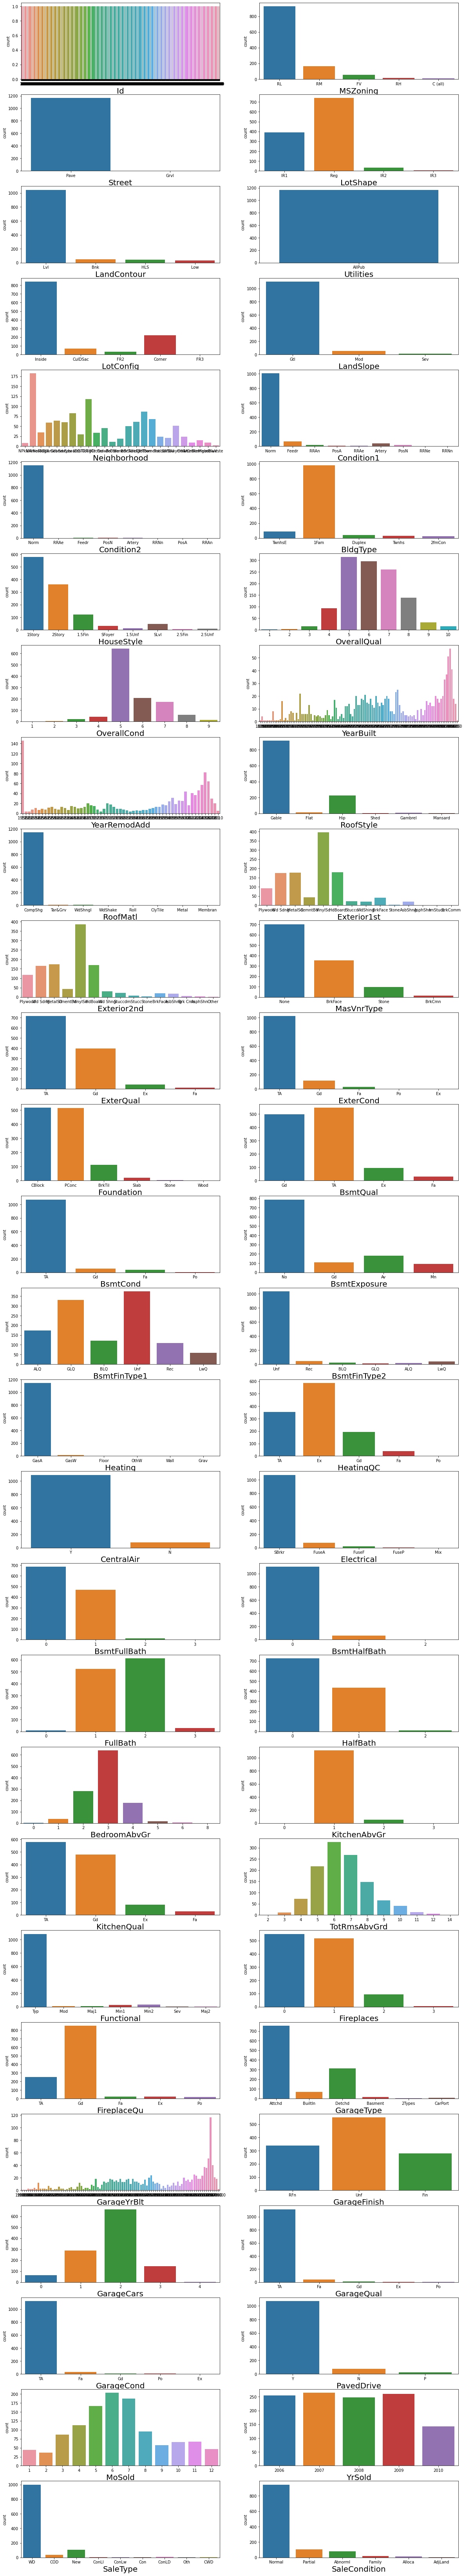

In [23]:
plt.figure(figsize=(20,120))
num =1

for column in data_visualization_nominal:
    if num <=56:
        ax = plt.subplot(28,2,num)
        sns.countplot(x=column,data=data_visualization_nominal)
        plt.xlabel(column,fontsize=20)
        
    num+=1
plt.show()  

                                Visualisation continuous train data 

In [27]:
data_visualisation_continuous=train_data[['MSSubClass', 'LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1','BsmtFinSF2',
                                          'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF','LowQualFinSF', 'GrLivArea',
                                          'GarageArea', 'WoodDeckSF', 'OpenPorchSF','EnclosedPorch', '3SsnPorch', 'ScreenPorch',
                                          'PoolArea', 'MiscVal','SalePrice']].copy()

data_visualisation_continuous.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'SalePrice'],
      dtype='object')

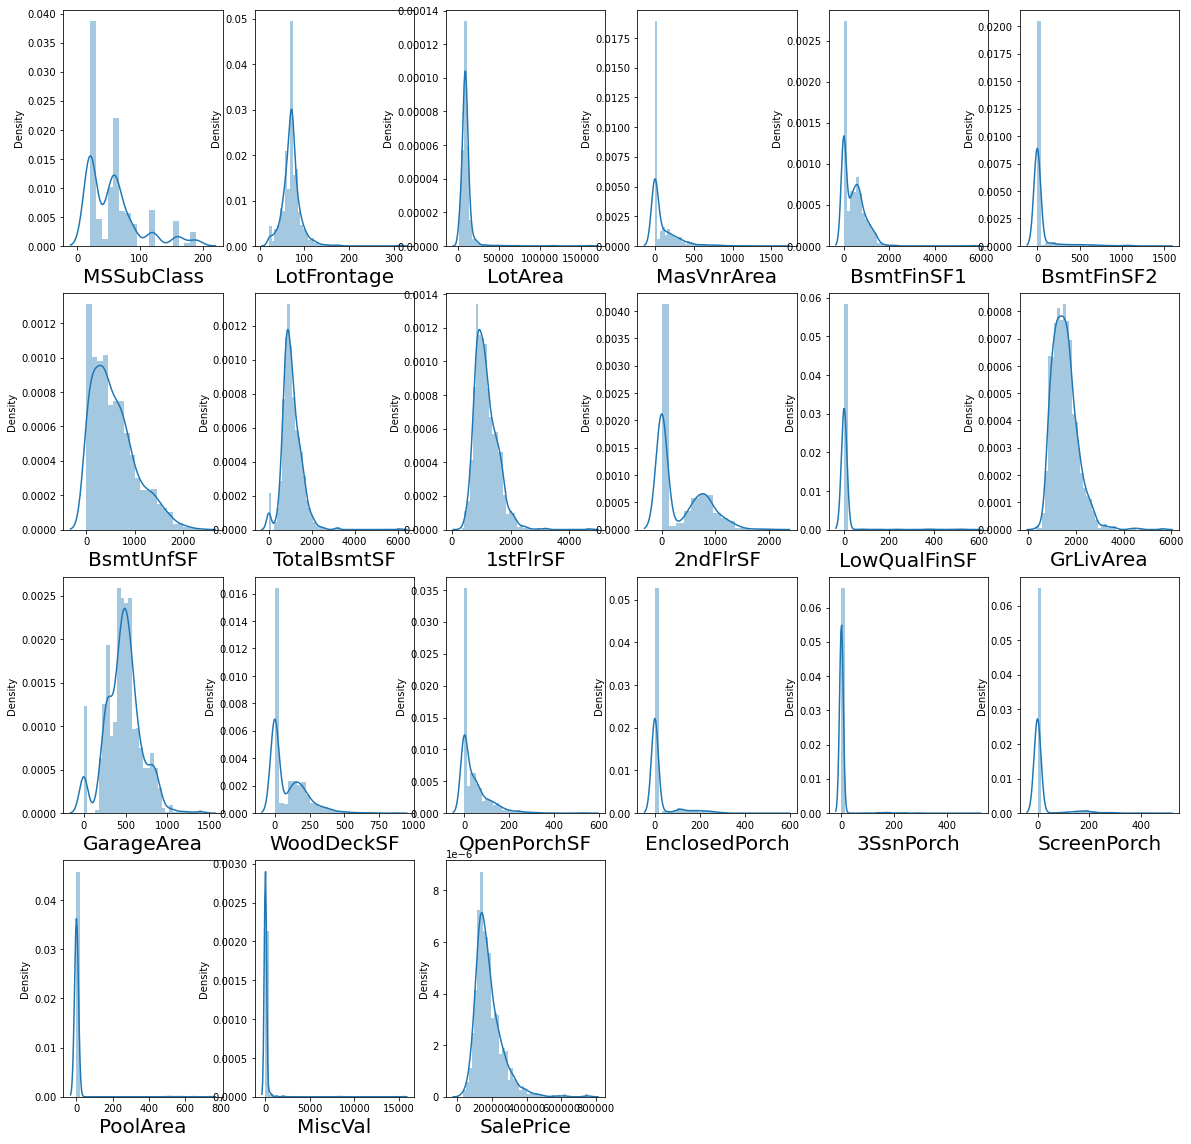

In [28]:
plt.figure(figsize=(20,20))
num =1

for column in data_visualisation_continuous:
    if num <=21:
        ax = plt.subplot(4,6,num)
        sns.distplot(data_visualisation_continuous[column])
        plt.xlabel(column,fontsize=20)
        
    num+=1
plt.show()    

                                        Encoding Technique

In [29]:
enc=OrdinalEncoder()

for i in train_data.columns:
    if train_data[i].dtypes=="object":
        train_data[i]=enc.fit_transform(train_data[i].values.reshape(-1,1))

In [30]:
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,127,120,3.0,70.98847,4928,1.0,0.0,3.0,0.0,4.0,...,0,0,0,0,0,2,2007,8.0,4.0,128000
1,889,20,3.0,95.00000,15865,1.0,0.0,3.0,0.0,4.0,...,0,0,224,0,0,10,2007,8.0,4.0,268000
2,793,60,3.0,92.00000,9920,1.0,0.0,3.0,0.0,1.0,...,0,0,0,0,0,6,2007,8.0,4.0,269790
3,110,20,3.0,105.00000,11751,1.0,0.0,3.0,0.0,4.0,...,0,0,0,0,0,1,2010,0.0,4.0,190000
4,422,20,3.0,70.98847,16635,1.0,0.0,3.0,0.0,2.0,...,0,0,0,0,0,6,2009,8.0,4.0,215000


In [31]:
for i in test_data.columns:
    if test_data[i].dtypes=="object":
        test_data[i]=enc.fit_transform(test_data[i].values.reshape(-1,1))

In [32]:
test_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,337,20,2.0,86.000000,14157,1.0,0.0,1.0,0.0,0.0,...,51,0,0,0,0,0,7,2007,5.0,2.0
1,1018,120,2.0,66.425101,5814,1.0,0.0,3.0,0.0,1.0,...,0,0,0,0,0,0,8,2009,0.0,0.0
2,929,20,2.0,66.425101,11838,1.0,3.0,3.0,0.0,4.0,...,151,0,0,0,0,0,6,2009,5.0,2.0
3,1148,70,2.0,75.000000,12000,1.0,3.0,0.0,0.0,4.0,...,0,0,0,0,0,0,7,2009,5.0,2.0
4,1227,60,2.0,86.000000,14598,1.0,0.0,3.0,0.0,1.0,...,18,0,0,0,0,0,1,2008,5.0,2.0


# Analysis

In [33]:
train_data.describe()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.0,1168.000000,...,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000
mean,724.136130,56.767979,3.013699,70.988470,10484.749144,0.996575,1.938356,2.773973,0.0,3.004281,...,23.015411,3.639555,15.051370,3.448630,47.315068,6.344178,2007.804795,7.465753,3.768836,181477.005993
std,416.159877,41.940650,0.633120,22.437056,8957.442311,0.058445,1.412262,0.710027,0.0,1.642667,...,63.191089,29.088867,55.080816,44.896939,543.264432,2.686352,1.329738,1.619459,1.112208,79105.586863
min,1.000000,20.000000,0.000000,21.000000,1300.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,0.000000,0.000000,34900.000000
25%,360.500000,20.000000,3.000000,60.000000,7621.500000,1.000000,0.000000,3.000000,0.0,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,8.000000,4.000000,130375.000000
50%,714.500000,50.000000,3.000000,70.988470,9522.500000,1.000000,3.000000,3.000000,0.0,4.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,8.000000,4.000000,163995.000000
75%,1079.500000,70.000000,3.000000,79.250000,11515.500000,1.000000,3.000000,3.000000,0.0,4.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,8.000000,4.000000,215000.000000
max,1460.000000,190.000000,4.000000,313.000000,164660.000000,1.000000,3.000000,3.000000,0.0,4.000000,...,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,8.000000,5.000000,755000.000000


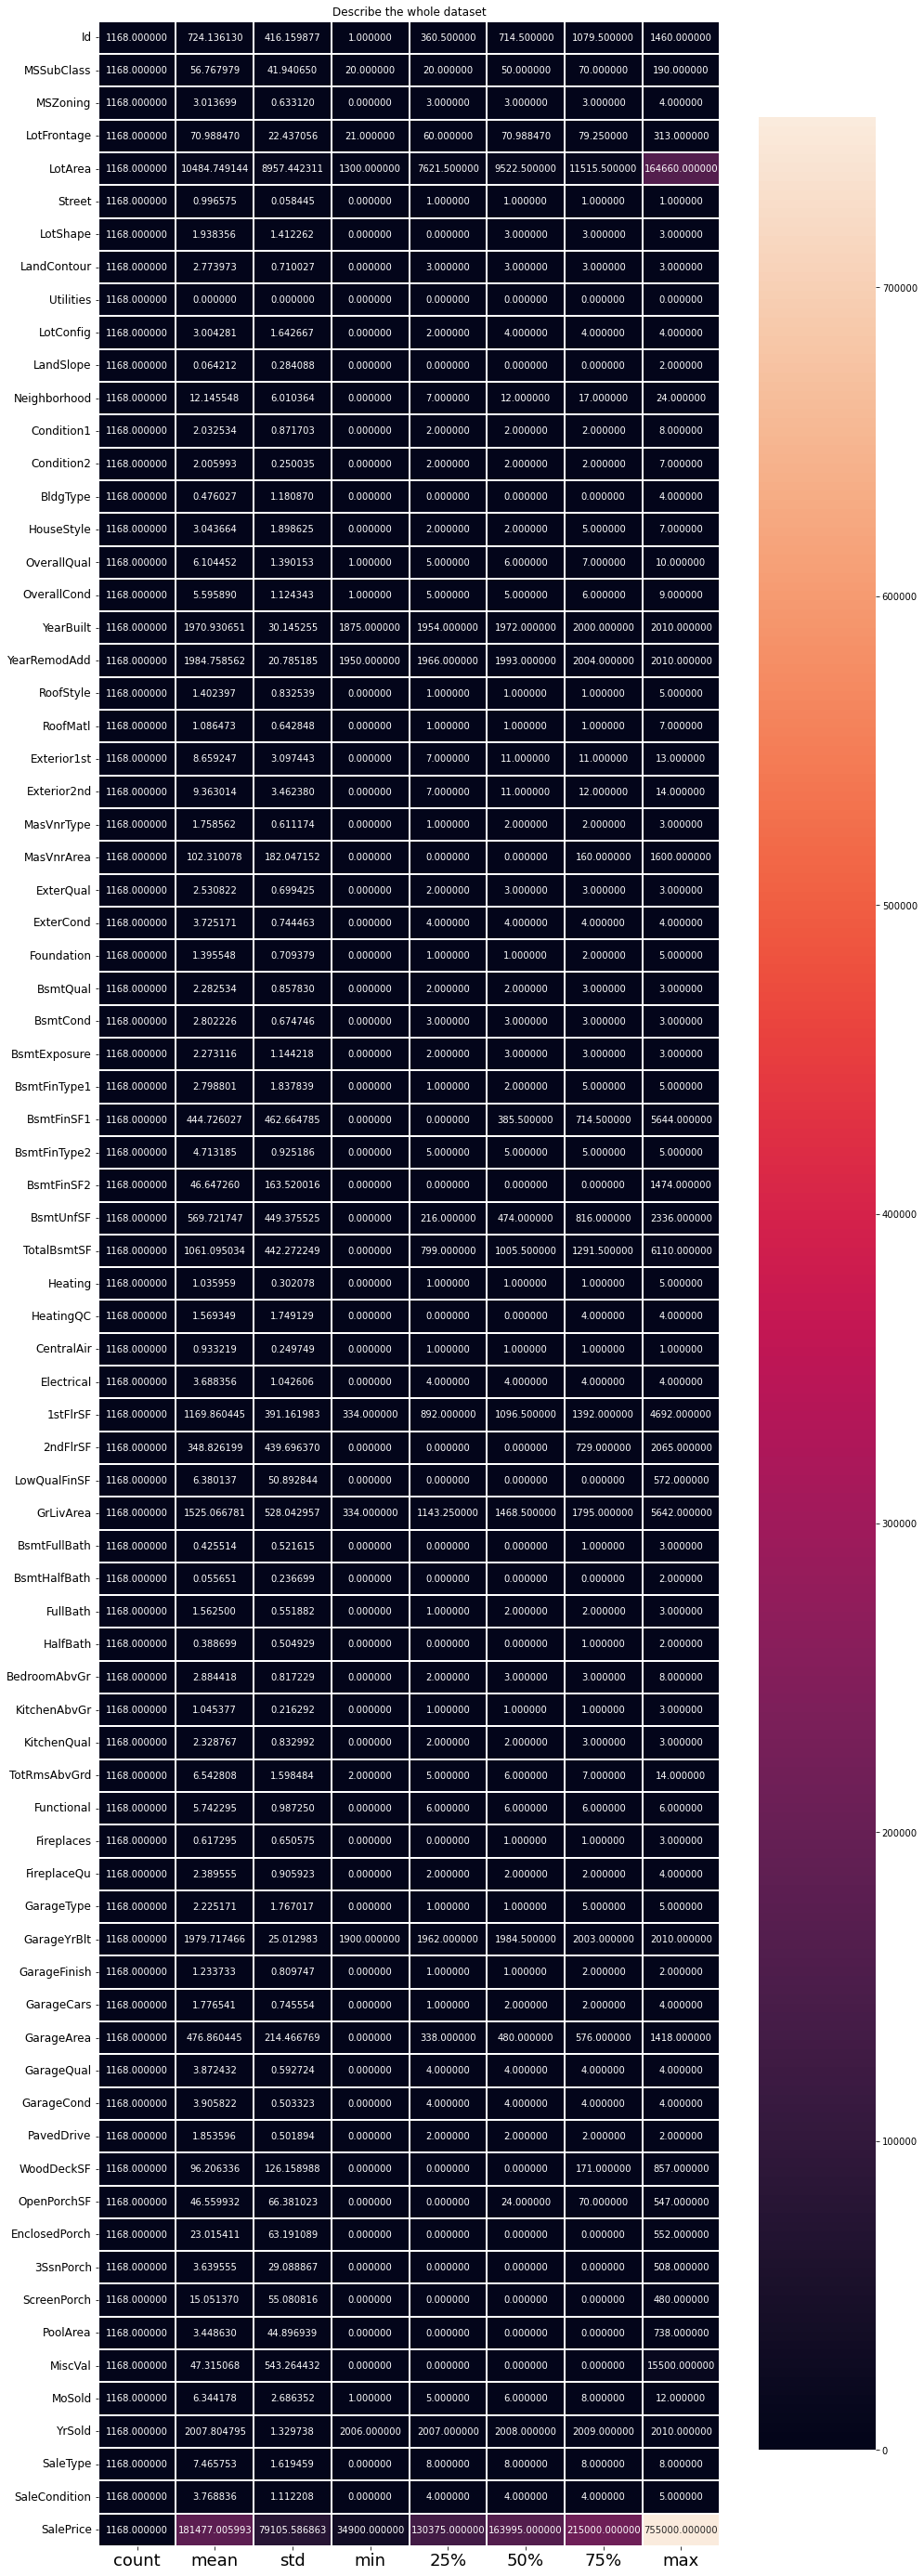

In [34]:
plt.figure(figsize=(15,50))
sns.heatmap(train_data.describe().transpose(),linewidth=2,annot=True,fmt='f')
plt.xticks(fontsize=18)
plt.yticks(fontsize=12)
plt.title("Describe the whole dataset")
plt.show()

                                            Correlation

In [42]:
train_data.corr()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,1.000000,0.004259,0.009307,-0.005969,-0.029212,0.003613,0.022978,-0.020245,NaN,0.053927,...,0.004885,-0.021773,0.005169,0.065832,0.001304,0.023479,-0.008853,0.024384,-0.014726,-0.023897
MSSubClass,0.004259,1.000000,0.007478,-0.336681,-0.124151,-0.035981,0.104485,-0.021387,NaN,0.076880,...,-0.004252,-0.043210,-0.013291,0.009583,-0.023503,-0.016015,-0.038595,0.035050,-0.028981,-0.060775
MSZoning,0.009307,0.007478,1.000000,-0.069661,-0.023328,0.140215,0.053655,0.001175,NaN,-0.027246,...,0.111221,0.004409,0.030793,-0.001663,0.003416,-0.051646,-0.004964,0.079854,0.004501,-0.133221
LotFrontage,-0.005969,-0.336681,-0.069661,1.000000,0.299452,-0.035309,-0.144523,-0.073451,NaN,-0.192468,...,0.020902,0.051084,0.030405,0.196001,-0.001329,0.022517,-0.003885,-0.035356,0.065091,0.323779
LotArea,-0.029212,-0.124151,-0.023328,0.299452,1.000000,-0.263973,-0.189201,-0.159038,NaN,-0.152063,...,-0.007446,0.025794,0.025256,0.097107,0.051679,0.015141,-0.035399,0.005421,0.034236,0.249499
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MoSold,0.023479,-0.016015,-0.051646,0.022517,0.015141,-0.008860,-0.050418,-0.023872,NaN,0.019084,...,-0.036523,0.020406,0.033064,-0.038624,-0.008773,1.000000,-0.144536,-0.063667,-0.003462,0.072764
YrSold,-0.008853,-0.038595,-0.004964,-0.003885,-0.035399,-0.019635,0.021421,0.009499,NaN,-0.009817,...,-0.005767,0.014440,0.017312,-0.066063,-0.008439,-0.144536,1.000000,0.013606,0.024505,-0.045508
SaleType,0.024384,0.035050,0.079854,-0.035356,0.005421,0.025920,-0.015161,-0.041763,NaN,-0.002039,...,-0.008234,-0.013696,0.010760,0.014047,0.015900,-0.063667,0.013606,1.000000,0.143557,-0.050851
SaleCondition,-0.014726,-0.028981,0.004501,0.065091,0.034236,0.014176,-0.054905,0.047715,NaN,0.043692,...,-0.091563,0.001236,0.002670,-0.074354,0.012178,-0.003462,0.024505,0.143557,1.000000,0.217687


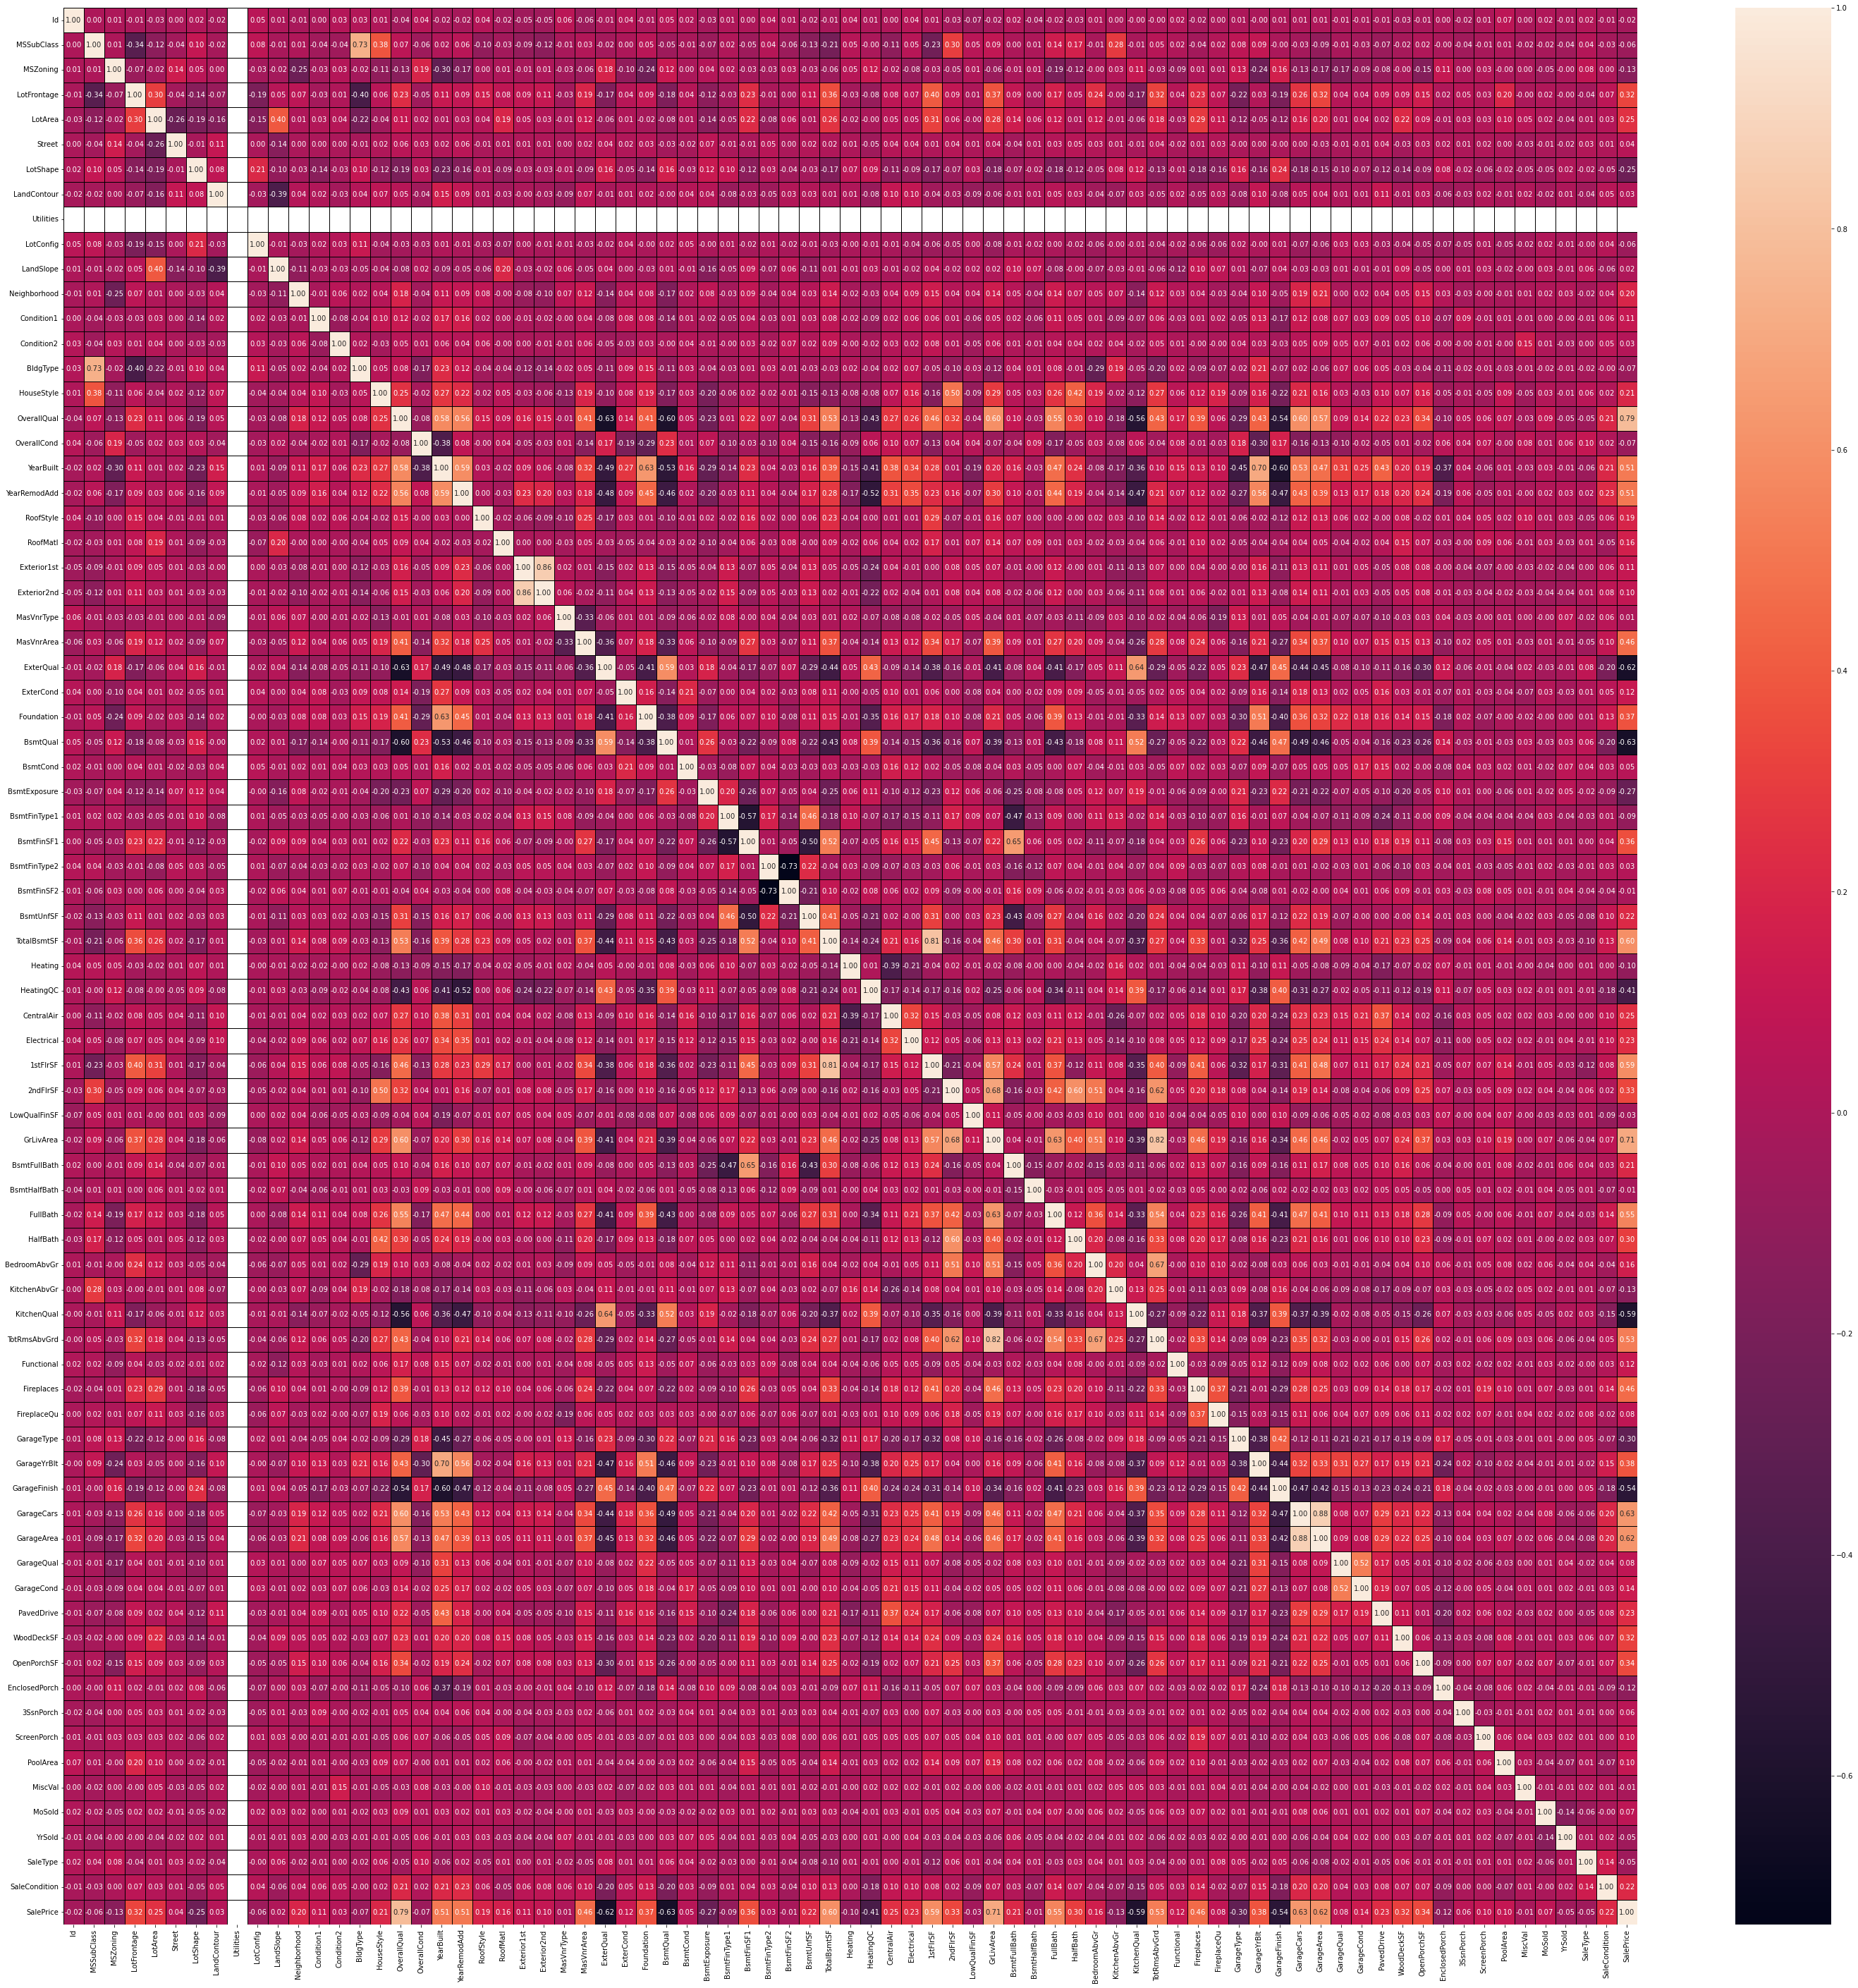

In [35]:
plt.figure(figsize=(50,50))
sns.heatmap(train_data.corr(),annot=True,linewidth=0.5,linecolor='black',fmt='0.2f')
plt.savefig('correlation_matrix.jpg')

In [39]:
np.abs(train_data.corr()['SalePrice']).sort_values(ascending=False)

SalePrice       1.000000
OverallQual     0.789185
GrLivArea       0.707300
GarageCars      0.628329
BsmtQual        0.626850
                  ...   
MiscVal         0.013071
BsmtHalfBath    0.011109
BsmtFinSF2      0.010151
MasVnrType      0.007732
Utilities            NaN
Name: SalePrice, Length: 77, dtype: float64

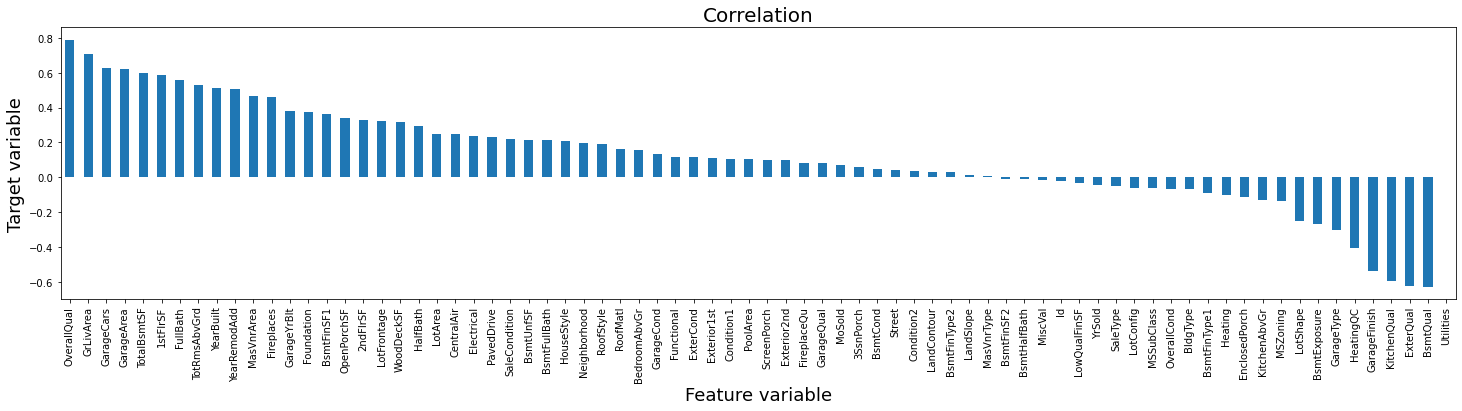

In [40]:
plt.figure(figsize=(25,5))
train_data.corr()['SalePrice'].sort_values(ascending=False).drop(['SalePrice']).plot(kind='bar')
plt.xlabel('Feature variable',fontsize=18)
plt.ylabel('Target variable',fontsize=18)
plt.title('Correlation',fontsize=20)
plt.show()

The upper bar represents positive relation with the SalePrice and the lower bar represents negatively relation.

Utilities has no correlation with the SalePrice,so we drop them.

In [41]:
train_data=train_data.drop(['Utilities'],axis=1)
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,127,120,3.0,70.98847,4928,1.0,0.0,3.0,4.0,0.0,...,0,0,0,0,0,2,2007,8.0,4.0,128000
1,889,20,3.0,95.00000,15865,1.0,0.0,3.0,4.0,1.0,...,0,0,224,0,0,10,2007,8.0,4.0,268000
2,793,60,3.0,92.00000,9920,1.0,0.0,3.0,1.0,0.0,...,0,0,0,0,0,6,2007,8.0,4.0,269790
3,110,20,3.0,105.00000,11751,1.0,0.0,3.0,4.0,0.0,...,0,0,0,0,0,1,2010,0.0,4.0,190000
4,422,20,3.0,70.98847,16635,1.0,0.0,3.0,2.0,0.0,...,0,0,0,0,0,6,2009,8.0,4.0,215000


In [42]:
test_data=test_data.drop(['Utilities'],axis=1)

                                     Relation between feature variable and the Price variable

<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

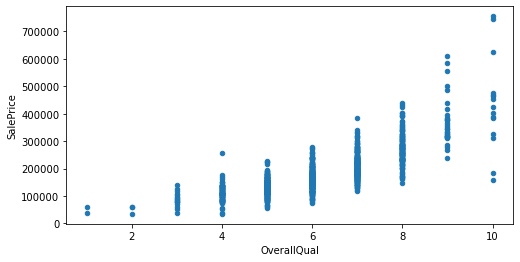

In [43]:
train_data.plot(kind='scatter',x='OverallQual' , y='SalePrice' ,figsize=(8,4))

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

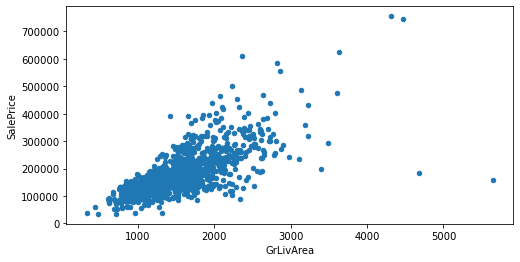

In [44]:
train_data.plot(kind='scatter',x='GrLivArea' , y='SalePrice' ,figsize=(8,4))

<AxesSubplot:xlabel='GarageCars', ylabel='SalePrice'>

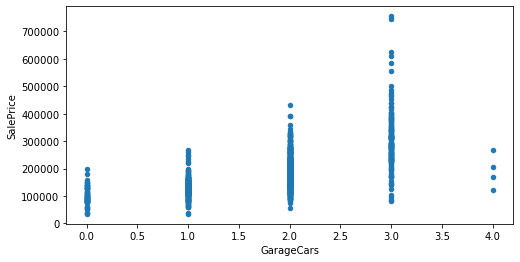

In [45]:
train_data.plot(kind='scatter',x='GarageCars' , y='SalePrice' ,figsize=(8,4))

<AxesSubplot:xlabel='BsmtCond', ylabel='SalePrice'>

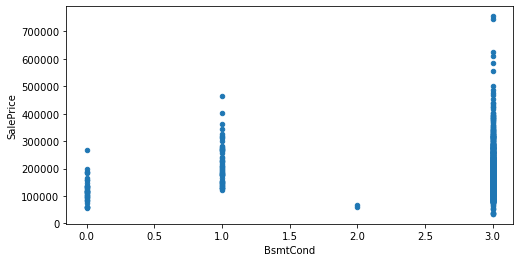

In [46]:
train_data.plot(kind='scatter',x='BsmtCond' , y='SalePrice' ,figsize=(8,4))

<AxesSubplot:xlabel='GarageArea', ylabel='SalePrice'>

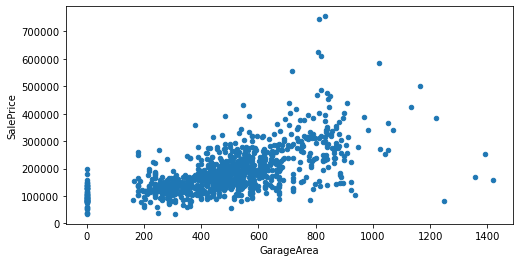

In [47]:
train_data.plot(kind='scatter',x='GarageArea' , y='SalePrice' ,figsize=(8,4))

<AxesSubplot:xlabel='ExterQual', ylabel='SalePrice'>

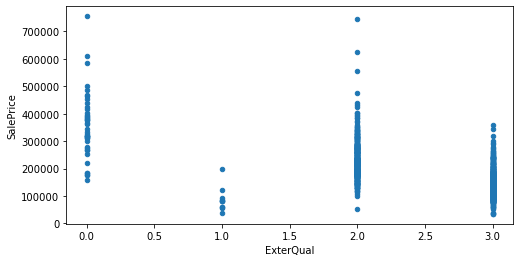

In [48]:
train_data.plot(kind='scatter',x='ExterQual' , y='SalePrice' ,figsize=(8,4))

<AxesSubplot:xlabel='TotalBsmtSF', ylabel='SalePrice'>

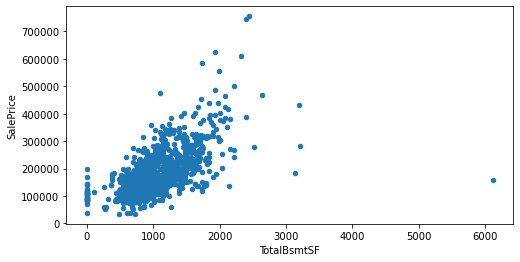

In [49]:
train_data.plot(kind='scatter',x='TotalBsmtSF' , y='SalePrice' ,figsize=(8,4))

<AxesSubplot:xlabel='KitchenQual', ylabel='SalePrice'>

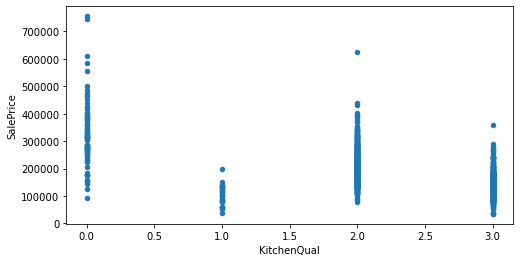

In [50]:
train_data.plot(kind='scatter',x='KitchenQual' , y='SalePrice' ,figsize=(8,4))

<AxesSubplot:xlabel='FullBath', ylabel='SalePrice'>

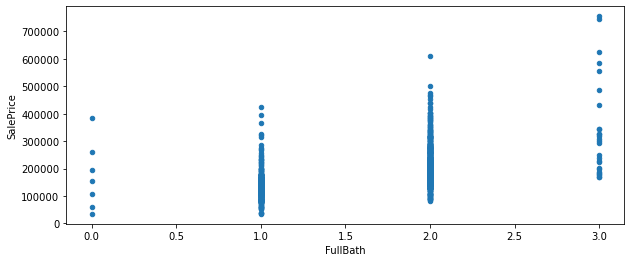

In [51]:
train_data.plot(kind='scatter',x='FullBath' , y='SalePrice' ,figsize=(10,4))

<AxesSubplot:xlabel='GarageFinish', ylabel='SalePrice'>

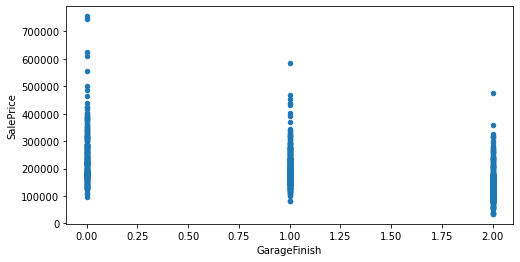

In [52]:
train_data.plot(kind='scatter',x='GarageFinish' , y='SalePrice' ,figsize=(8,4))

<AxesSubplot:xlabel='TotRmsAbvGrd', ylabel='SalePrice'>

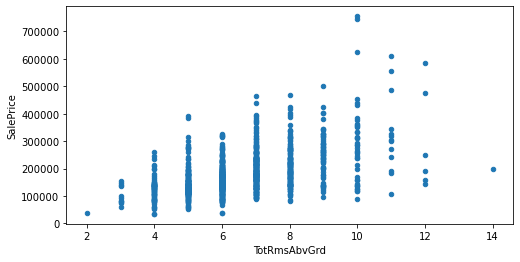

In [53]:
train_data.plot(kind='scatter',x='TotRmsAbvGrd' , y='SalePrice' ,figsize=(8,4))

<AxesSubplot:xlabel='YearBuilt', ylabel='SalePrice'>

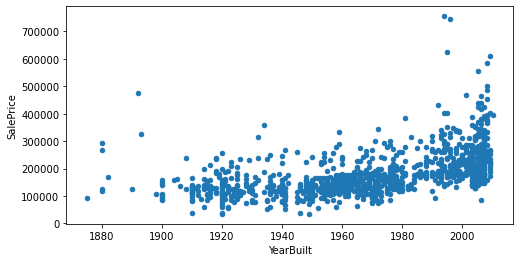

In [54]:
train_data.plot(kind='scatter',x='YearBuilt' , y='SalePrice' ,figsize=(8,4))

<AxesSubplot:xlabel='YearRemodAdd', ylabel='SalePrice'>

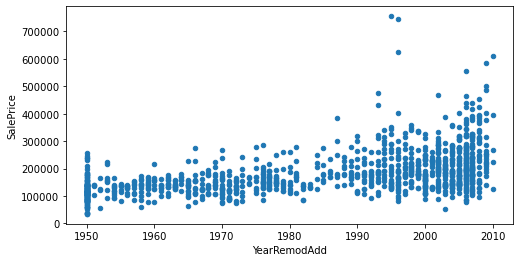

In [55]:
train_data.plot(kind='scatter',x='YearRemodAdd' , y='SalePrice' ,figsize=(8,4))

Skewness and outliers are checked only on continuous data, neither on nominala data nor on target variable

                                                Outliers

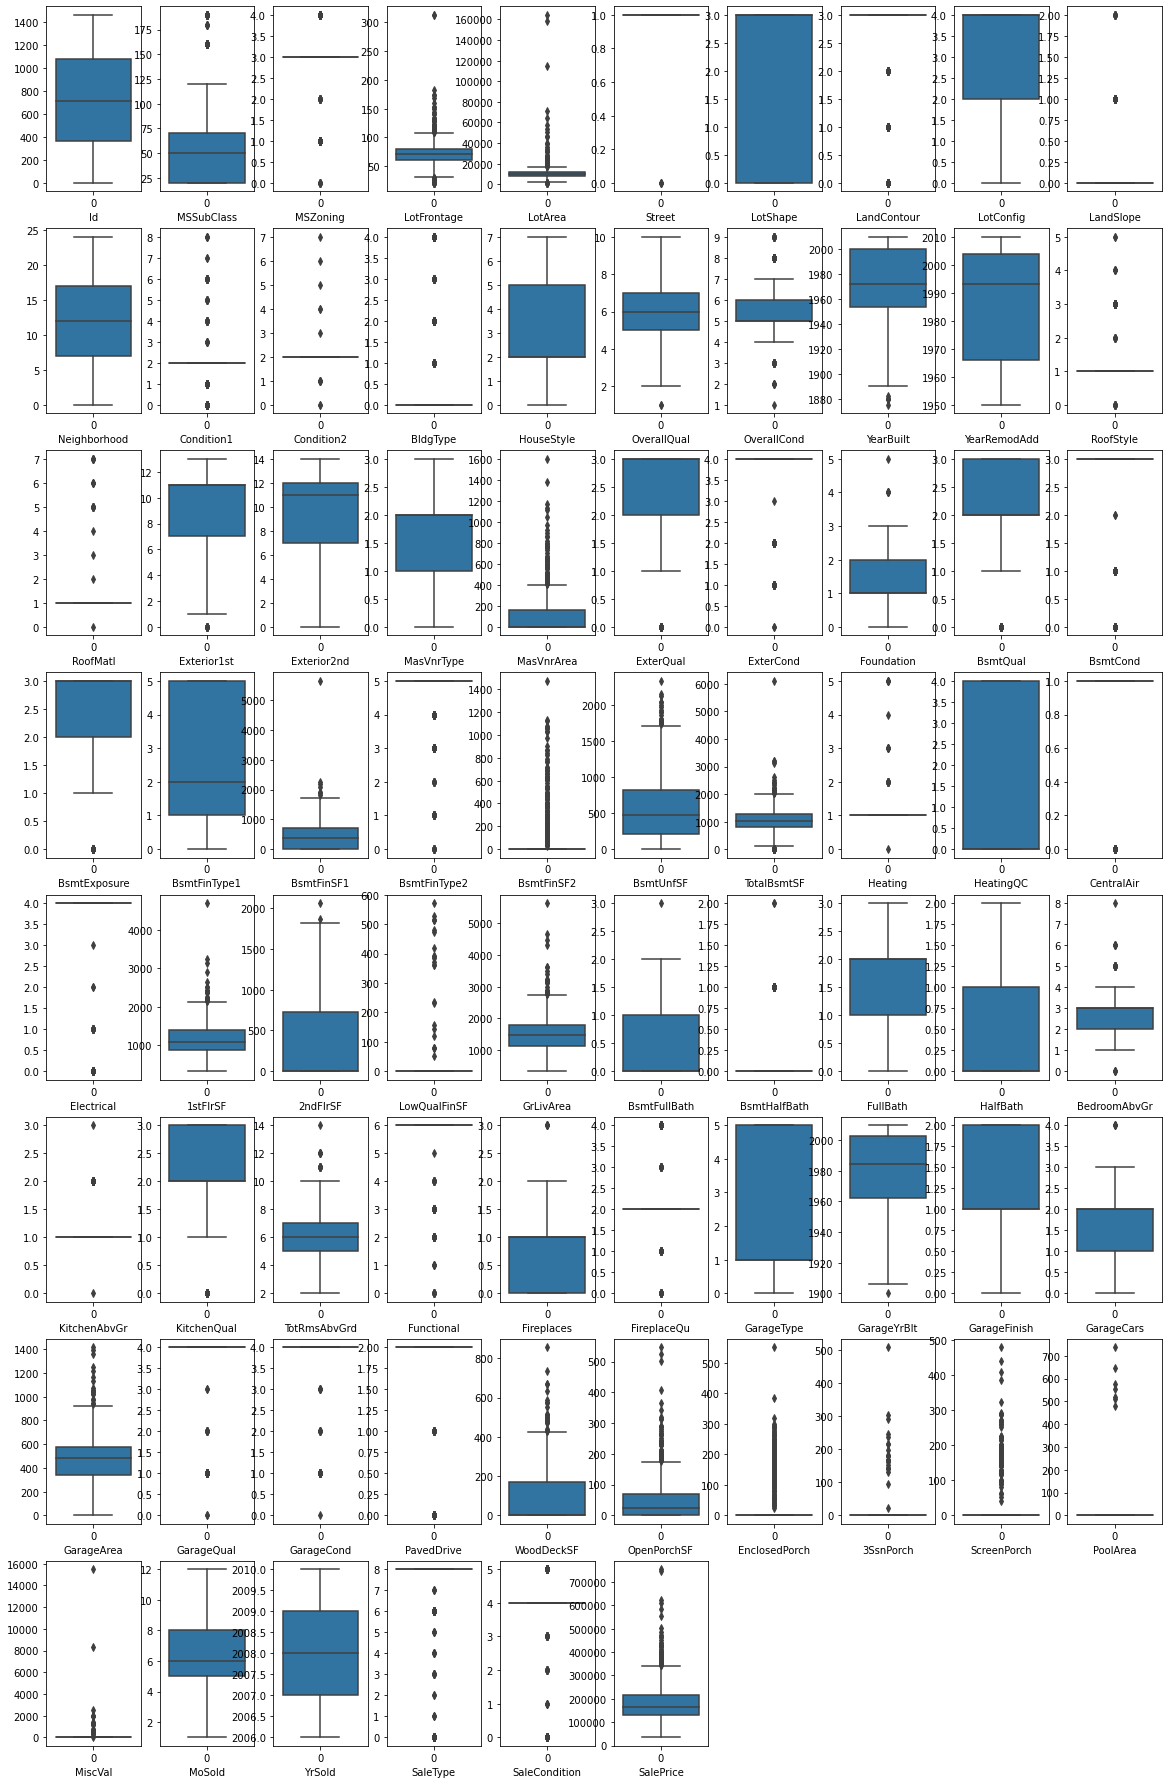

In [67]:
plt.figure(figsize=(20,32))
number = 1

for column in train_data:
    if number <=76:
        plt.subplot(8,10,number)
        ax = sns.boxplot(data=train_data[column])
        plt.xlabel(column,fontsize=10)
       
    number+=1
plt.show()    

Ouliers are present in all of the continuous columns are:
    
    * MSSubClass
    * LotFrontage
    * LotArea
    * MasVnrArea
    * BsmtFinSF1
    * BsmtFinSF2
    * BsmtUnfSF
    * TotalBsmtSF
    * 1stFlrSF
    * 2ndFlrSF
    * LowQualFinSF 
    * GrLivArea
    * GarageArea
    * WoodDeckSF 
    * OpenPorchSF 
    * EnclosedPorch 
    * 3SsnPorch 
    * ScreenPorch 
    * PoolArea 
    * MiscVal

                                          Skewness

In [71]:
for col in train_data:
    val=train_data[col].skew()
    print(col,val)

Id 0.026526032012241022
MSSubClass 1.422018988135284
MSZoning -1.7967850975188662
LotFrontage 2.7103829016240844
LotArea 10.659284548299626
Street -17.021969279861406
LotShape -0.6037752483890678
LandContour -3.125981609220846
LotConfig -1.118821122735627
LandSlope 4.812567939321139
Neighborhood 0.043735292946020986
Condition1 3.008289061615448
Condition2 11.51445787731543
BldgType 2.3186565788172033
HouseStyle 0.2856801863402313
OverallQual 0.1750824992845271
OverallCond 0.5807139655333367
YearBuilt -0.5792035025736898
YearRemodAdd -0.49586353822203716
RoofStyle 1.4985601535327249
RoofMatl 7.577352367722009
Exterior1st -0.6128162942734297
Exterior2nd -0.5923490009398771
MasVnrType -0.10460894668927623
MasVnrArea 2.8346577812934406
ExterQual -1.8108426693880766
ExterCond -2.5162186426386888
Foundation -0.0027614041954660954
BsmtQual -1.3437810646702586
BsmtCond -3.2935537892719613
BsmtExposure -1.166986828385308
BsmtFinType1 -0.06890116255409194
BsmtFinSF1 1.8716059327957582
BsmtFinTyp

Take threshold range of the skewness is (-0.5,0.5)

Skewness present in the columns are:
    * MSSubClass
    * LotFrontage
    * LotArea
    * MasVnrArea
    * BsmtFinSF1
    * BsmtFinSF2
    * BsmtUnfSF
    * 1stFlrSF
    * 2ndFlrSF
    * LowQualFinSF 
    * GrLivArea
    * WoodDeckSF 
    * OpenPorchSF 
    * EnclosedPorch 
    * 3SsnPorch 
    * ScreenPorch 
    * PoolArea 
    * MiscVal

                                    Variance Inflation Factor

In [65]:
x = train_data.drop(['SalePrice'],axis=1)
y = train_data['SalePrice']

vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(x_scaled,i)for i in  range(x_scaled.shape[1])]
vif['Input']= x.columns
vif

,VIF,Input
0,1.071831,Id
1,5.000908,MSSubClass
2,1.361935,MSZoning
3,1.770437,LotFrontage
4,1.753816,LotArea
...,...,...
70,1.086252,MiscVal
71,1.084926,MoSold
72,1.093199,YrSold
73,1.133707,SaleType


In [66]:
x.columns.where(vif['VIF']>5)

Index([           nan,   'MSSubClass',            nan,            nan,
                  nan,            nan,            nan,            nan,
                  nan,            nan,            nan,            nan,
                  nan,            nan,            nan,            nan,
                  nan,    'YearBuilt',            nan,            nan,
                  nan,            nan,            nan,            nan,
                  nan,            nan,            nan,            nan,
                  nan,            nan,            nan,            nan,
         'BsmtFinSF1',            nan,   'BsmtFinSF2',    'BsmtUnfSF',
        'TotalBsmtSF',            nan,            nan,            nan,
                  nan,     '1stFlrSF',     '2ndFlrSF', 'LowQualFinSF',
          'GrLivArea',            nan,            nan,            nan,
                  nan,            nan,            nan,            nan,
       'TotRmsAbvGrd',            nan,            nan,            nan,
      

 Thirteen columns having VIF greater than 5, so we do not consider it 

                                          Removing Outliers

In [67]:
x = train_data.drop(['SalePrice'],axis=1)
y = train_data['SalePrice']

z=np.abs(zscore(x))
threshold=3
print(np.where(z>3))

(array([   1,    1,    1, ..., 1166, 1166, 1166], dtype=int64), array([ 9, 20, 34, ..., 39, 62, 63], dtype=int64))


The outliers are removed from the categorical data,so we consider our orignal data

                                         Removing Skewness

In [68]:
train_data["MSSubClass"]=np.sqrt(train_data["MSSubClass"])
train_data["LotFrontage"]=np.sqrt(train_data["LotFrontage"])
train_data["LotArea"]=np.sqrt(train_data["LotArea"])
train_data["MasVnrArea"]=np.sqrt(train_data["MasVnrArea"])
train_data["BsmtFinSF1"]=np.sqrt(train_data["BsmtFinSF1"])
train_data["BsmtFinSF2"]=np.sqrt(train_data["BsmtFinSF2"])
train_data["BsmtUnfSF"]=np.sqrt(train_data["BsmtUnfSF"])
train_data["1stFlrSF"]=np.sqrt(train_data["1stFlrSF"])
train_data["2ndFlrSF"]=np.sqrt(train_data["2ndFlrSF"])
train_data["LowQualFinSF"]=np.sqrt(train_data["LowQualFinSF"])
train_data["GrLivArea"]=np.sqrt(train_data["GrLivArea"])
train_data["WoodDeckSF"]=np.sqrt(train_data["WoodDeckSF"])
train_data["OpenPorchSF"]=np.sqrt(train_data["OpenPorchSF"])
train_data["EnclosedPorch"]=np.sqrt(train_data["EnclosedPorch"])
train_data["3SsnPorch"]=np.sqrt(train_data["3SsnPorch"])
train_data["ScreenPorch"]=np.sqrt(train_data["ScreenPorch"])
train_data["PoolArea"]=np.sqrt(train_data["PoolArea"])
train_data["MiscVal"]=np.sqrt(train_data["MiscVal"])

In [69]:
for col in train_data:
    val=train_data[col].skew()
    print(col,val)

Id 0.026526032012241022
MSSubClass 0.7571418920467229
MSZoning -1.7967850975188662
LotFrontage 0.541795599524065
LotArea 3.659306494611423
Street -17.021969279861406
LotShape -0.6037752483890678
LandContour -3.125981609220846
LotConfig -1.118821122735627
LandSlope 4.812567939321139
Neighborhood 0.043735292946020986
Condition1 3.008289061615448
Condition2 11.51445787731543
BldgType 2.3186565788172033
HouseStyle 0.2856801863402313
OverallQual 0.1750824992845271
OverallCond 0.5807139655333367
YearBuilt -0.5792035025736898
YearRemodAdd -0.49586353822203716
RoofStyle 1.4985601535327249
RoofMatl 7.577352367722009
Exterior1st -0.6128162942734297
Exterior2nd -0.5923490009398771
MasVnrType -0.10460894668927623
MasVnrArea 1.0754145988732948
ExterQual -1.8108426693880766
ExterCond -2.5162186426386888
Foundation -0.0027614041954660954
BsmtQual -1.3437810646702586
BsmtCond -3.2935537892719613
BsmtExposure -1.166986828385308
BsmtFinType1 -0.06890116255409194
BsmtFinSF1 -0.011788519333937625
BsmtFinT

Still skewness present in fourteen of the columns are:

    * MSSubClass
    * LotFrontage
    * LotArea
    * MasVnrArea
    * BsmtFinSF2
    * 2ndFlrSF
    * LowQualFinSF 
    * GrLivArea
    * OpenPorchSF 
    * EnclosedPorch 
    * 3SsnPorch 
    * ScreenPorch 
    * PoolArea 
    * MiscVal
    
So,we drop all of them    

In [75]:
train_data=train_data.drop(['MSSubClass','LotFrontage','LotArea','MasVnrArea','BsmtFinSF2','2ndFlrSF','LowQualFinSF','GrLivArea'
                            ,'OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal'],axis=1)
train_data.head()

,Id,MSZoning,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,127,3.0,1.0,0.0,3.0,4.0,0.0,13.0,2.0,2.0,...,440,4.0,4.0,2.0,0.000000,2,2007,8.0,4.0,128000
1,889,3.0,1.0,0.0,3.0,4.0,1.0,12.0,2.0,2.0,...,621,4.0,4.0,2.0,9.000000,10,2007,8.0,4.0,268000
2,793,3.0,1.0,0.0,3.0,1.0,0.0,15.0,2.0,2.0,...,455,4.0,4.0,2.0,13.416408,6,2007,8.0,4.0,269790
3,110,3.0,1.0,0.0,3.0,4.0,0.0,14.0,2.0,2.0,...,546,4.0,4.0,2.0,0.000000,1,2010,0.0,4.0,190000
4,422,3.0,1.0,0.0,3.0,2.0,0.0,14.0,2.0,2.0,...,529,4.0,4.0,2.0,15.491933,6,2009,8.0,4.0,215000


In [85]:
test_data=test_data.drop(['MSSubClass','LotFrontage','LotArea','MasVnrArea','BsmtFinSF2','2ndFlrSF','LowQualFinSF','GrLivArea'
                            ,'OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal'],axis=1)
test_data.head()

,Id,MSZoning,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,MoSold,YrSold,SaleType,SaleCondition
0,337,2.0,1.0,0.0,1.0,0.0,0.0,21.0,2.0,0.0,...,3,676,4.0,4.0,2.0,178,7,2007,5.0,2.0
1,1018,2.0,1.0,0.0,3.0,1.0,0.0,21.0,2.0,0.0,...,2,565,4.0,4.0,2.0,63,8,2009,0.0,0.0
2,929,2.0,1.0,3.0,3.0,4.0,0.0,4.0,2.0,0.0,...,2,522,4.0,4.0,2.0,202,6,2009,5.0,2.0
3,1148,2.0,1.0,3.0,0.0,4.0,0.0,5.0,2.0,0.0,...,1,234,4.0,4.0,2.0,0,7,2009,5.0,2.0
4,1227,2.0,1.0,0.0,3.0,1.0,0.0,20.0,1.0,0.0,...,3,668,4.0,4.0,2.0,100,1,2008,5.0,2.0


# Model Testing

In [76]:
x = train_data.drop(['SalePrice'],axis=1)
y = train_data['SalePrice']

There are large number of categorical data so we do not use StandardScaler()

                                        Linear Regression

In [107]:
lr=LinearRegression()

In [108]:
lr.fit(x,y)
pred=lr.predict(x)
r2_score(y,pred)*100

82.59797540099589

In [110]:
y_pred=lr.predict(test_data)

In [112]:
y_pred

array([5840341.80410629, 4143266.18438278, 4631078.78743813,
       2360220.51528536, 2403723.772073  , 1519586.28959924,
       2922297.85862442, 5343728.23622615, 5179370.07069875,
       3635322.70635324, 1323096.41911926, 3585951.72402798,
       2477446.07013547, 4724637.42842196, 5138938.14019035,
       2476201.19236228, 2487344.49291726, 2478106.11270853,
       2176355.72930787, 3147206.74803627, 2517034.09356813,
       3152697.87166257, 3508245.53628218,  863799.80647264,
       2229360.43087727, 2833358.5701242 , 2455361.35251585,
       3538845.10669635, 2110495.21152549, 2635319.76716564,
       3003737.72111886, 3623376.81874845, 4727631.96379741,
       4226205.98416232, 2083412.3465965 , 1977266.75038014,
       3055237.00179441, 1805719.86997098, 2354198.96707904,
       2401523.47733419, 2001792.67977355, 4454959.8702352 ,
       2271139.20435924, 3402890.91833495, 2508502.29515165,
       2682799.48614332, 2884385.12718039, 1904402.392521  ,
       4014487.76467048,

                                            Decision Tree Regressor

In [113]:
dtr=DecisionTreeRegressor()

In [114]:
dtr.fit(x,y)
pred=dtr.predict(x)
r2_score(y,pred)*100

100.0

In [115]:
y_pred=dtr.predict(test_data)
y_pred

array([367294., 345000., 278000., 335000., 200624.,  80000., 153000.,
       324000., 302000., 193000., 115000., 149000.,  67000., 170000.,
       372500., 105000., 116500., 152000., 214000., 244000., 241500.,
       110000., 139000., 135000., 140000., 153000., 215000., 139000.,
       237500., 135000., 169000., 220000., 320000., 110000., 139900.,
       194500., 200000., 127500., 127500., 207500.,  62383., 324000.,
       192500., 220000., 122000., 224000., 124500., 159434., 302000.,
       160000., 127500., 184000., 133000.,  67000., 215000.,  82500.,
       162000., 162000.,  98000., 252000.,  90000., 160000., 152000.,
       224000., 244000.,  93000., 176000., 244000., 153000., 110000.,
       430000., 110000., 173000., 130000., 224000., 302000., 345000.,
       236500., 430000., 137000., 290000., 179000., 125000., 168000.,
       215000., 320000., 115000., 345000., 127500., 215000., 240000.,
       179200., 224000., 207500., 150900., 200000., 345000., 160000.,
       440000., 1325

                                       Random Forest Regressor

In [116]:
rfr=RandomForestRegressor()

In [117]:
rfr.fit(x,y)
pred=rfr.predict(x)
r2_score(y,pred)*100

97.59036428711484

In [118]:
y_pred=rfr.predict(test_data)
y_pred

array([402447.49, 307079.68, 276439.85, 233525.57, 212371.29, 107536.11,
       154091.03, 340730.7 , 266193.03, 187785.06, 104497.36, 153710.69,
       133171.91, 173647.59, 348483.82, 134066.6 , 137289.18, 141984.85,
       226321.95, 248422.07, 211544.19, 169376.44, 165379.74,  98658.08,
       138574.17, 146408.36, 191571.13, 161929.  , 203964.16, 113685.58,
       165436.2 , 242601.67, 232934.8 , 166372.72, 137748.91, 204763.5 ,
       204066.05, 140127.23, 177498.42, 193718.89, 134998.14, 353484.51,
       214265.22, 235766.2 , 149442.89, 158185.96, 146823.68, 118177.17,
       240662.28, 350666.05, 149161.9 , 207132.36, 114657.32, 117611.25,
       247562.2 , 127352.97, 155482.75, 211912.76, 145522.19, 279952.44,
       121836.52, 180100.11, 145182.54, 179360.02, 238034.63, 120830.57,
       160066.51, 250239.44, 158332.52, 166111.98, 338520.47, 172915.48,
       187058.84, 147604.16, 170800.95, 262369.49, 366018.83, 248553.97,
       333987.34, 154471.62, 257946.34, 148674.57, 

                                     Ada Boost Regressor

In [119]:
ada= AdaBoostRegressor()

In [120]:
ada.fit(x,y)
pred=ada.predict(x)
r2_score(y,pred)*100

84.6463426368518

In [121]:
y_pred=ada.predict(test_data)
y_pred

array([382649.76030928, 274641.19047619, 245472.99      , 232763.45679012,
       222262.67555556, 149928.00961538, 167627.65517241, 317324.14197531,
       250715.06363636, 208079.57798165, 119965.10344828, 169032.        ,
       132527.87647059, 168379.54545455, 299398.4965035 , 138123.78911565,
       140508.56692913, 140508.56692913, 245395.03829787, 248856.41832669,
       232406.84716157, 169934.96573209, 172170.22222222, 139963.23333333,
       149928.00961538, 152974.84946237, 202657.22727273, 165686.95652174,
       207848.66486486, 139963.23333333, 164004.08273381, 245395.03829787,
       245032.64111498, 169032.        , 140508.56692913, 236300.30927835,
       212155.35714286, 168379.54545455, 173822.68292683, 205951.99006623,
       138123.78911565, 327041.02830189, 237493.50943396, 245395.03829787,
       164004.08273381, 168112.0661157 , 140508.56692913, 138123.78911565,
       247216.17910448, 317324.14197531, 163418.25098039, 207893.109375  ,
       119965.10344828, 1

                                        Gradient Boosting Regressor

In [122]:
gb= GradientBoostingRegressor()

In [124]:
gb.fit(x,y)
pred=gb.predict(x)
r2_score(y,pred)*100

95.8198985862217

In [125]:
y_pred=gb.predict(test_data)
y_pred

array([356794.20982223, 274911.77446721, 250934.82946851, 201613.53952934,
       228929.01219192,  99821.05582538, 134942.6014237 , 338421.08713098,
       224030.31363399, 211002.70068813, 124053.05235569, 161349.37390653,
        91531.1346459 , 196152.70633982, 307885.08410835, 164192.29620387,
       147163.8914741 , 155022.51490488, 200802.93021034, 215682.98788796,
       167739.47281998, 158484.43820673, 175986.41211036,  97418.61469912,
       133233.71847892, 159526.90050745, 177034.0745001 , 181204.62916908,
       179339.59349598,  99126.81563884, 139486.88417042, 260700.34762275,
       234538.02843136, 204180.37880345, 164024.6991299 , 217540.171648  ,
       157904.75045001, 124672.20075529, 171325.35709344, 147948.45214105,
       142710.84211973, 319669.8008103 , 222973.12659348, 254775.70541624,
       160930.92837722, 176633.5201951 , 141848.49046507,  75606.05418691,
       262577.89363368, 355260.62767785, 162062.81217594, 201351.5723029 ,
       106035.54613455,  

We get r2_score for the regressor model are:

    * Linear Regression = 82.59
    * Decision Tree Regressor = 100.00
    * Random Forest Regressor = 97.59
    * Ada Boost Regressor = 84.64
    * Gradient Boosting Regressor = 95.81

On seeing all the model we get that Decision Tree is best model for hyper tuning.

# Hyper Parameter Tuning on Decision Tree Regressor

In [139]:
dtr=DecisionTreeRegressor()

In [140]:
parameters = {'max_features':['auto','sqrt'],
             'max_depth':range(10,50),
             'min_samples_leaf':range(2,5),
             'min_samples_split':range(2,5)}

In [142]:
RCV=GridSearchCV(dtr,parameters,n_jobs=-1)
RCV.fit(x,y)
RCV.best_params_

{'max_depth': 29,
 'max_features': 'auto',
 'min_samples_leaf': 3,
 'min_samples_split': 2}

In [143]:
clf = DecisionTreeRegressor(min_samples_split=2,min_samples_leaf=3,max_features='auto',max_depth=29)
clf.fit(x,y)

train_pred=clf.predict(x)
print('Train data:',r2_score(y,train_pred)*100)

y_pred = clf.predict(test_data) 

Train data: 95.75163916683904


On hyper parameter tuning we get r2_score = 95.75

                                                   Conclusion
 SalesPrice for the test_data                                           

In [145]:
test_prediction=pd.DataFrame({'SalesPrice':y_pred})
test_prediction

,SalesPrice
0,391637.000000
1,304225.000000
2,277195.400000
3,343614.000000
4,207008.000000
...,...
287,287975.000000
288,147500.000000
289,125833.333333
290,227333.333333
